# Conexión con la API del COVID-19 y análisis con Pandas

Me conecto a la API https://api.covid19api.com/

# Instalación de librerías

In [7]:
!pip install pandas

# Configuración de Pandas

In [8]:
import pandas as pd

# Crear variable 
Definimos una variable que tiene este valor https://api.covid19api.com/countries

In [9]:
url = 'https://api.covid19api.com/countries'

In [10]:
url

'https://api.covid19api.com/countries'

# Crear dataframe
Vamos a crear un dataframe con la función de panda.  
Voy a definir un dataframe que es como se llama la estrutura de tablas/datos en Phyton y usaré la funcion de _pd.read_json_
Si lo invoco me sale el json en formato de tabla.

In [11]:
df = pd.read_json(url)

In [12]:
df

,Country,Slug,ISO2
0,Gibraltar,gibraltar,GI
1,Oman,oman,OM
2,France,france,FR
3,Jersey,jersey,JE
4,Mali,mali,ML
...,...,...,...
243,Puerto Rico,puerto-rico,PR
244,Papua New Guinea,papua-new-guinea,PG
245,Saint Pierre and Miquelon,saint-pierre-and-miquelon,PM
246,Timor-Leste,timor-leste,TL


## España

Ya tengo el dataframe, pero para que salgan los datos de **España** (en este caso en inglés, Spain) qué vamos hacer. Como tengo una columna que se llama **Country**, creo una lista nueva donde le digo a esa lista que el país que voy a seleccionar es ==, tiene que ser Spain.

In [13]:
df[df['Country'] == 'Spain']

,Country,Slug,ISO2
141,Spain,spain,ES


#### Casos España en tiempo real

Se buscaron los casos de España (Spain) en tiempo real. Creo la url que se llama **rt**, que viene de real time, y además se va a llamar **url_rt_es**, real time de España (Spain). 
En la primera línea defino la url que son los casos confirmados en este país. Luego defino el objeto **df_rt_es**, el cual es el encargado de leer la información de la url. 

In [14]:
url_rt_es = 'https://api.covid19api.com/country/spain/status/confirmed/live'
df_rt_es = pd.read_json(url_rt_es)
df_rt_es

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-02 00:00:00+00:00
893,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-03 00:00:00+00:00
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00
895,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-05 00:00:00+00:00


Si marco la función df_rt_es.head() me permite ver la **parte inicial de la tabla**, como aprecia a continuación.

In [15]:
df_rt_es.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00


Con la función df_rt_es.tail() podemos ver la **cola de la tabla**. Procedo a marcarla. 

In [16]:
df_rt_es.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
892,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-02 00:00:00+00:00
893,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-03 00:00:00+00:00
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00
895,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-05 00:00:00+00:00
896,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-06 00:00:00+00:00


#### Casos de España con sus fechas

Para poder apreciar una gráfica de España con el **número de casos y sus respectivas fechas** debo convertir la columna de fecha en columna de control, solicitando que se muestren los datos de los casos desde el 20 de enero de 2020 hasta la fecha en la que hice esta actividad, por esta razón marcamos la función que se muestra a continuación, pero utlizando un nombre de variable plot_rt_es. 

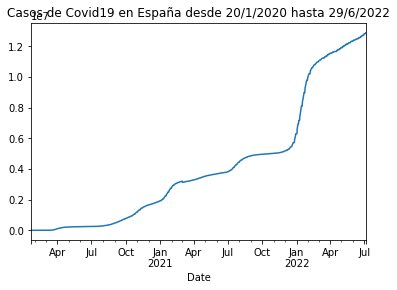

In [17]:
plot_rt_es = df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid19 en España desde 20/1/2020 hasta 29/6/2022")

# Datos de Panamá
Repetimos el proceso, usamos el mismo código de variable, pero en este caso con la *url de Panamá*.

In [18]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
190,Panama,panama,PA


In [19]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
190,Panama,panama,PA


Definimos una variable **url_rt_pa**
La url de Panamá tiene un **json**.
Quiero crear un objeto, en este caso una tabla y el valor de esta tabla es el que sale del resultado del usar la función de pandas **read.json** sobre la url que he definido anteriormente.
En la tercera celda a jupyter muestra esta variable **df_rt_pa**

In [20]:
url_rt_pa = 'https://api.covid19api.com/country/panama/status/confirmed/live'
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-03 00:00:00+00:00
894,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-04 00:00:00+00:00
895,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-05 00:00:00+00:00
896,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-06 00:00:00+00:00


Tal como hice con España, en este caso para poder ver una gráfica de Panamá con el **número de casos y sus respectivas fechas** debo convertir la columna de fecha en columna de control, solicitando que se muestren los datos de los casos desde el 20 de enero de 2020 hasta la fecha en la que hice esta actividad, por esta razón marcamos la función que se muestra a continuación, pero utlizando un nombre de variable plot_rt_pa. 

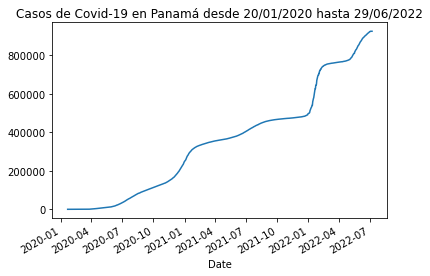

In [21]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 29/06/2022")

Para la gráfica que se visualiza a continuación añadí **,kind="area"** para un gráfico de área. 

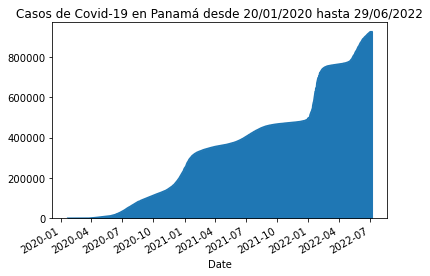

In [22]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 29/06/2022",kind="area")

Para lograr la gráfica que se ve a continuación usé la función **,kind="bar"** así se logrará ver una gráfica de barras. 

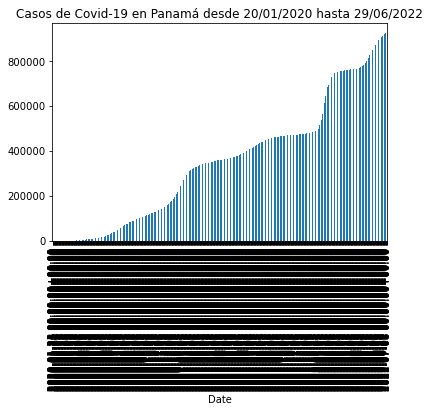

In [23]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 29/06/2022",kind="bar")

# Ploteamos dos países
Para realizar esta acción hay que **identificar nuevamente las variables previas** de json de las dos url, así no será necesario repetir el proceso.

In [24]:
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_es = pd.read_json(url_rt_es)

Debemos plotear para poder ver la gráfica. En cada país los casos se van a separar por fechas. 

<AxesSubplot:title={'center':'Casos de Covid-19 en Panamá'}, xlabel='Date'>

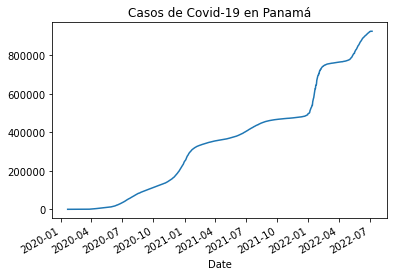

In [25]:
casos_pa = df_rt_pa.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en Panamá")

<AxesSubplot:title={'center':'Casos de Covid-19 en España'}, xlabel='Date'>

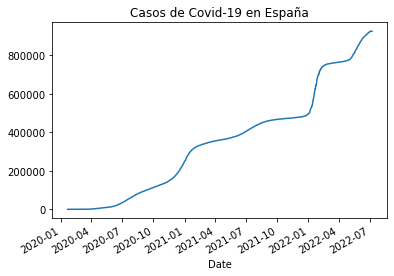

In [26]:
casos_es = df_rt_es.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en España")

Si queremos **visualizar** podemos concatenar ambas tablas con los datos que hemos visto hasta el momento.

In [27]:
pa_vs_es = pd.concat([casos_es,casos_pa],axis=1)
pa_vs_es

,Cases,Cases
Date,,
2020-01-22 00:00:00+00:00,0.0,0
2020-01-23 00:00:00+00:00,0.0,0
2020-01-24 00:00:00+00:00,0.0,0
2020-01-25 00:00:00+00:00,0.0,0
2020-01-26 00:00:00+00:00,0.0,0
...,...,...
2022-07-03 00:00:00+00:00,12818184.0,925254
2022-07-04 00:00:00+00:00,12818184.0,925254
2022-07-05 00:00:00+00:00,12890002.0,925254


Continuando con este **ejercicio de programación literaria**, podemos decir que para reconocer los países se debe marcar las columnas con el nombre y de esta manera podemos ver la gráfica con los datos nombrados.

In [28]:
pa_vs_es.columns= ['España','Panamá']
pa_vs_es

,España,Panamá
Date,,
2020-01-22 00:00:00+00:00,0.0,0
2020-01-23 00:00:00+00:00,0.0,0
2020-01-24 00:00:00+00:00,0.0,0
2020-01-25 00:00:00+00:00,0.0,0
2020-01-26 00:00:00+00:00,0.0,0
...,...,...
2022-07-03 00:00:00+00:00,12818184.0,925254
2022-07-04 00:00:00+00:00,12818184.0,925254
2022-07-05 00:00:00+00:00,12890002.0,925254


#### Comparación Panamá vs España

Ahora veremos la _comparación de ambos países_ en una gráfica y para lograr esto debemos plotear. 

<AxesSubplot:title={'center':'Comparativa Covid-19 España-Panamá'}, xlabel='Date'>

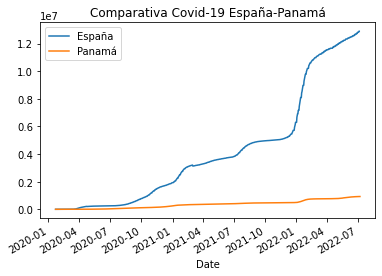

In [29]:
pa_vs_es.plot(title="Comparativa Covid-19 España-Panamá")

# Ahora haré una comparativa de los países de Centroamérica

Tal como se lee en la indicación de la actividad hay que realizar una comparación entre los siguientes países: 
1. Panamá
2. Costa Rica
3. Nicaragua
4. Guatemala
5. El Salvador
6. Honduras

Para esta acción lo primero que haré es **verificar** el slug y el ISO2 para emplear en la URL. Esto se hará en cada uno de los países mencionados. 

In [30]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
190,Panama,panama,PA


In [31]:
df[df['Country'] == 'Costa Rica']

,Country,Slug,ISO2
242,Costa Rica,costa-rica,CR


In [32]:
df[df['Country'] == 'Nicaragua']

,Country,Slug,ISO2
36,Nicaragua,nicaragua,NI


In [33]:
df[df['Country'] == 'Guatemala']

,Country,Slug,ISO2
239,Guatemala,guatemala,GT


In [34]:
df[df['Country'] == 'El Salvador']

,Country,Slug,ISO2
139,El Salvador,el-salvador,SV


In [35]:
df[df['Country'] == 'Honduras']


,Country,Slug,ISO2
91,Honduras,honduras,HN


## ¿Qué haré a continuación?
Lo que corresponde es **definir la variable** con la *url* de cada uno de los países, para entonces hacer la llamada a json para las *url* y así ver las tablas correspondientes a cada uno de los países. 
En el caso de **Panamá** ya lo habíamos hecho al inicio de esta práctica, pero se debe repetir para efectos de este ejercicio. 

In [36]:
url_rt_pa = 'https://api.covid19api.com/country/panama/status/confirmed/live'
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-03 00:00:00+00:00
894,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-04 00:00:00+00:00
895,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-05 00:00:00+00:00
896,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-06 00:00:00+00:00


In [37]:
url_rt_cr = 'https://api.covid19api.com/country/costa-rica/status/confirmed/live'
df_rt_cr = pd.read_json(url_rt_cr)
df_rt_cr

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-03 00:00:00+00:00
894,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-04 00:00:00+00:00
895,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-05 00:00:00+00:00
896,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-06 00:00:00+00:00


In [38]:
url_rt_ni = 'https://api.covid19api.com/country/nicaragua/status/confirmed/live'
df_rt_ni = pd.read_json(url_rt_ni)
df_rt_ni

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-22 00:00:00+00:00
1,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-23 00:00:00+00:00
2,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-24 00:00:00+00:00
3,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-25 00:00:00+00:00
4,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-03 00:00:00+00:00
894,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-04 00:00:00+00:00
895,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-05 00:00:00+00:00
896,Nicaragua,NI,,,,12.87,-85.21,14721,confirmed,2022-07-06 00:00:00+00:00


In [39]:
url_rt_gt = 'https://api.covid19api.com/country/guatemala/status/confirmed/live'
df_rt_gt = pd.read_json(url_rt_gt)
df_rt_gt

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-22 00:00:00+00:00
1,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-23 00:00:00+00:00
2,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-24 00:00:00+00:00
3,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-25 00:00:00+00:00
4,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Guatemala,GT,,,,15.78,-90.23,920294,confirmed,2022-07-03 00:00:00+00:00
894,Guatemala,GT,,,,15.78,-90.23,921146,confirmed,2022-07-04 00:00:00+00:00
895,Guatemala,GT,,,,15.78,-90.23,922340,confirmed,2022-07-05 00:00:00+00:00
896,Guatemala,GT,,,,15.78,-90.23,927473,confirmed,2022-07-06 00:00:00+00:00


In [40]:
url_rt_sv = 'https://api.covid19api.com/country/el-salvador/status/confirmed/live'
df_rt_sv = pd.read_json(url_rt_sv)
df_rt_sv

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-22 00:00:00+00:00
1,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-23 00:00:00+00:00
2,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-24 00:00:00+00:00
3,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-25 00:00:00+00:00
4,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-03 00:00:00+00:00
894,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-04 00:00:00+00:00
895,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-05 00:00:00+00:00
896,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-06 00:00:00+00:00


In [41]:
url_rt_hn = 'https://api.covid19api.com/country/honduras/status/confirmed/live'
df_rt_hn = pd.read_json(url_rt_hn)
df_rt_hn

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-22 00:00:00+00:00
1,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-23 00:00:00+00:00
2,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-24 00:00:00+00:00
3,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-25 00:00:00+00:00
4,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
893,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-03 00:00:00+00:00
894,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-04 00:00:00+00:00
895,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-05 00:00:00+00:00
896,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-06 00:00:00+00:00


Como hicimos anteriormente procedí a **elegir los casos** por fecha y plotear la **gráfica para visualizarlos**. Esta es una acción que también practicamos en el intermedio de este ejercicio y se repite en cada uno de los países. 

<AxesSubplot:title={'center':'Casos de Covid-19 en Panamá'}, xlabel='Date'>

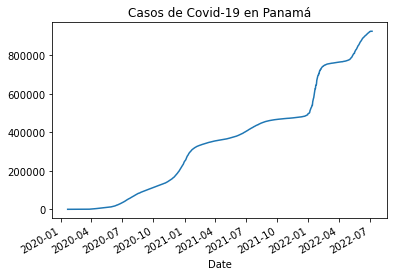

In [42]:
casos_pa = df_rt_pa.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en Panamá")

<AxesSubplot:title={'center':'Casos de Covid-19 en Costa Rica'}, xlabel='Date'>

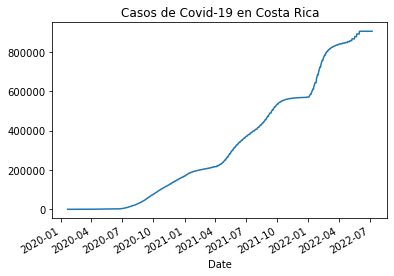

In [43]:
casos_cr = df_rt_cr.set_index('Date')['Cases']
casos_cr.plot(title="Casos de Covid-19 en Costa Rica")

<AxesSubplot:title={'center':'Casos de Covid-19 en Nicaragua'}, xlabel='Date'>

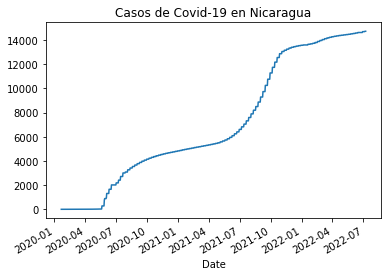

In [44]:
casos_ni = df_rt_ni.set_index('Date')['Cases']
casos_ni.plot(title="Casos de Covid-19 en Nicaragua")

<AxesSubplot:title={'center':'Casos de Covid-19 en Guatemala'}, xlabel='Date'>

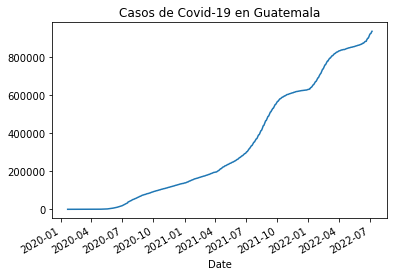

In [45]:
casos_gt = df_rt_gt.set_index('Date')['Cases']
casos_gt.plot(title="Casos de Covid-19 en Guatemala")

<AxesSubplot:title={'center':'Casos de Covid-19 en El Salvador'}, xlabel='Date'>

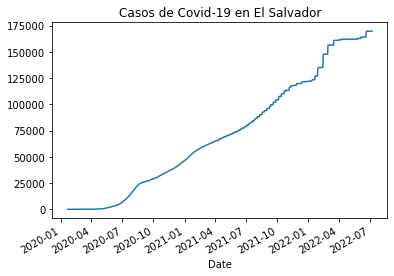

In [46]:
casos_sv = df_rt_sv.set_index('Date')['Cases']
casos_sv.plot(title="Casos de Covid-19 en El Salvador")

<AxesSubplot:title={'center':'Casos de Covid-19 en Honduras'}, xlabel='Date'>

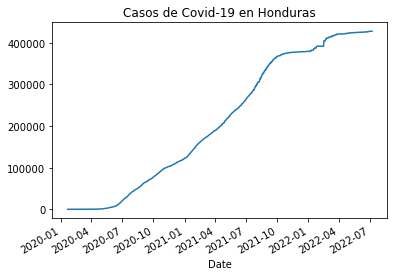

In [47]:
casos_hn = df_rt_hn.set_index('Date')['Cases']
casos_hn.plot(title="Casos de Covid-19 en Honduras")

### Concatenación de todas las tablas

Voy a concatenar las **tablas de cada uno de los países** para una mejor visualización.

In [48]:
casos_pa_cr_ni_gt_sv_hn = pd.concat([casos_pa,casos_cr,casos_ni,casos_gt,casos_sv,casos_hn],axis=1)
casos_pa_cr_ni_gt_sv_hn.columns= ['Panamá','Costa Rica', 'Nicaragua', 'Guatemala', 'El Salvador', 'Honduras']
casos_pa_cr_ni_gt_sv_hn

,Panamá,Costa Rica,Nicaragua,Guatemala,El Salvador,Honduras
Date,,,,,,
2020-01-22 00:00:00+00:00,0,0,0,0,0,0
2020-01-23 00:00:00+00:00,0,0,0,0,0,0
2020-01-24 00:00:00+00:00,0,0,0,0,0,0
2020-01-25 00:00:00+00:00,0,0,0,0,0,0
2020-01-26 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-07-03 00:00:00+00:00,925254,904934,14690,920294,169646,427718
2022-07-04 00:00:00+00:00,925254,904934,14690,921146,169646,427718
2022-07-05 00:00:00+00:00,925254,904934,14690,922340,169646,427718


### Gráfica de todos los países de Centroamérica

Luego de concatenar las tablas se procedió a **plotear** para ver la gráfica comparativa de todos los países antes vistos. 


#### Análisis

En la gráfica siguiente hay datos comparativos de los casos de covid-19 en los países centroamericanos. Podemos ver que en el caso de **Panamá**, el número va en aumento en una línea casi similar a **Panamá, Costa Rica y Guatemala**. 

<AxesSubplot:title={'center':'Comparativa Covid-19 en los países de Centroamérica'}, xlabel='Date'>

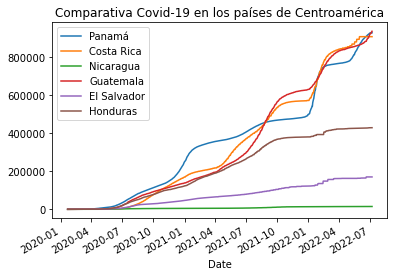

In [49]:
casos_pa_cr_ni_gt_sv_hn.plot(title="Comparativa Covid-19 en los países de Centroamérica")